In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
data = pd.read_csv('dataset/AirPassengers.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


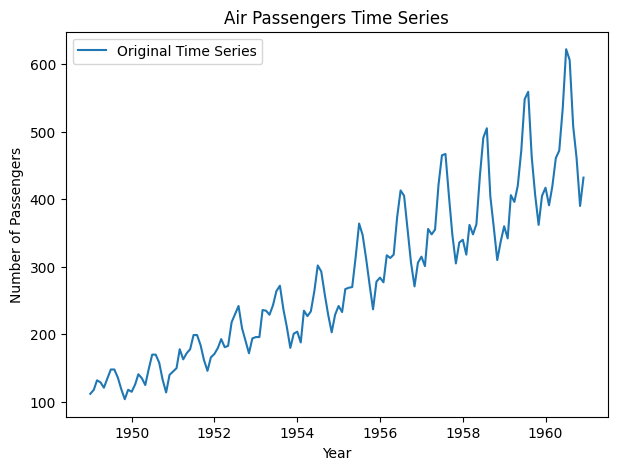

In [7]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Plot the original time series data
plt.figure(figsize=(7, 5))
plt.plot(data, label='Original Time Series')
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

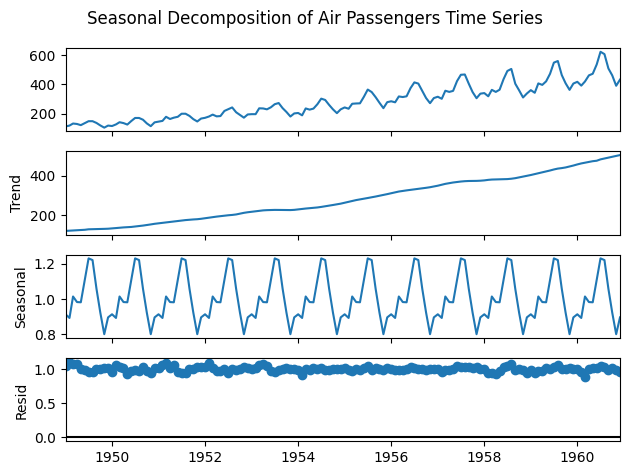

In [11]:
# Decompose the time series into trend, seasonal and residual components
result = seasonal_decompose(data, model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series')
plt.tight_layout()
plt.show()

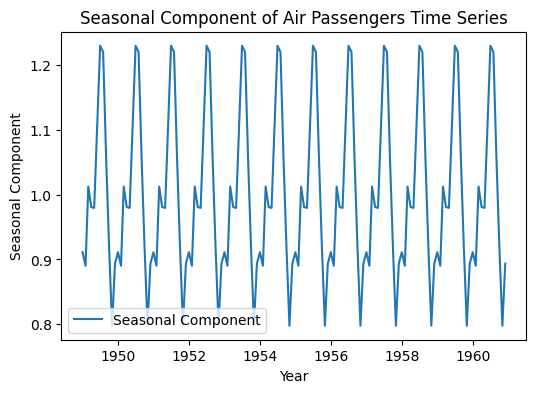

In [12]:
# Plot the seasonal component
plt.figure(figsize=(6, 4))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

In [17]:
result.seasonal

Month
1949-01-01    0.911256
1949-02-01    0.890342
1949-03-01    1.012397
1949-04-01    0.980719
1949-05-01    0.979495
                ...   
1960-08-01    1.219640
1960-09-01    1.056262
1960-10-01    0.920694
1960-11-01    0.797882
1960-12-01    0.893580
Name: seasonal, Length: 144, dtype: float64

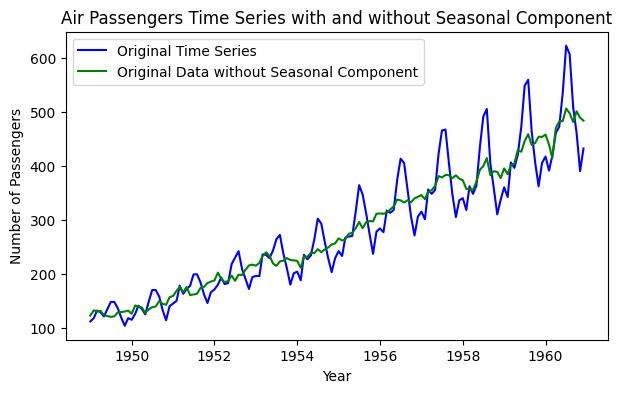

In [20]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))
# Plot the original time series data
plt.plot(data, label='Original Time Series', color='blue')
data_without_seasonal = data['Passengers'] / result.seasonal
# Plot the original data without the seasonal component
plt.plot(data_without_seasonal, label='Original Data without Seasonal Component', color='green')
plt.title('Air Passengers Time Series with and without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [22]:
np.random.seed(0)
date_rng = pd.date_range(start='2021-01-01', periods=365, freq='D')
data = np.sin(np.arange(365) * 2 * np.pi / 365) + np.random.normal(0, 0.5, 365)
ts = pd.Series(data, index=date_rng)
ts

2021-01-01    0.882026
2021-01-02    0.217292
2021-01-03    0.523791
2021-01-04    1.172066
2021-01-05    1.002581
                ...   
2021-12-27    0.263264
2021-12-28   -0.066917
2021-12-29    0.414305
2021-12-30    0.135561
2021-12-31   -0.025054
Freq: D, Length: 365, dtype: float64

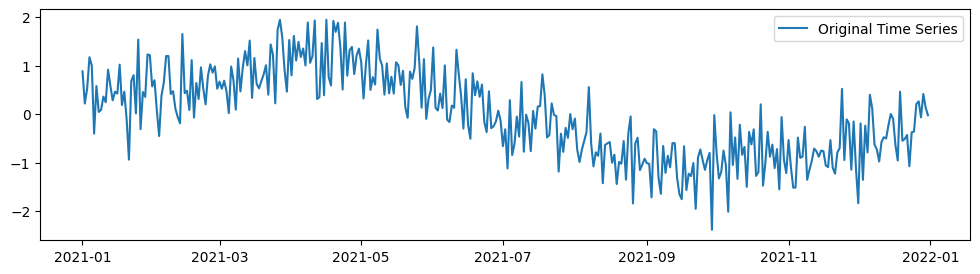

In [23]:
plt.figure(figsize=(12, 3))
plt.plot(ts, label='Original Time Series')
plt.legend()

In [32]:
result_add = seasonal_decompose(ts, model='additive')

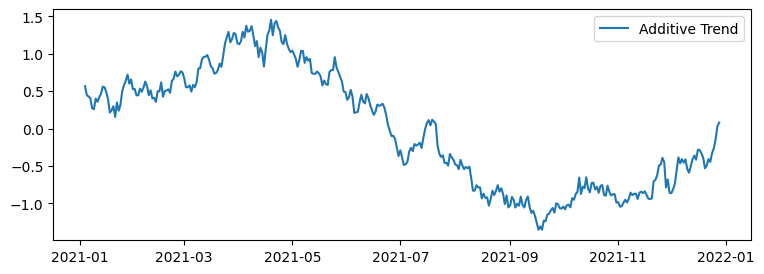

In [37]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.trend, label='Additive Trend')
# plt.plot(result_add.observed, label='Observed Trend')

plt.legend()

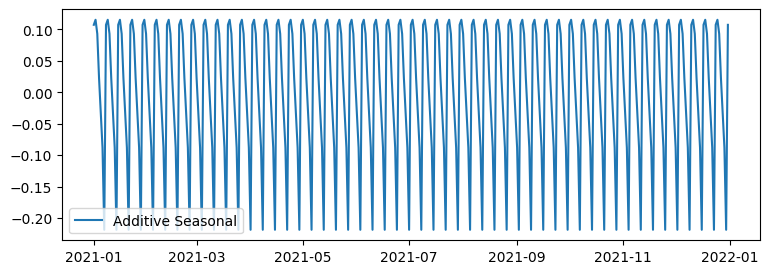

In [36]:
plt.figure(figsize=(9, 3))

plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()

In [41]:
sma_window = 7  # 7-day moving average
sma = ts.rolling(window=sma_window).mean()
sma

2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2021-12-27   -0.326866
2021-12-28   -0.262944
2021-12-29   -0.142060
2021-12-30    0.030998
2021-12-31    0.081171
Freq: D, Length: 365, dtype: float64

In [42]:
ema_window = 30  # 30-day moving average
ema = ts.ewm(span=ema_window, adjust=False).mean()
ema

2021-01-01    0.882026
2021-01-02    0.839140
2021-01-03    0.818795
2021-01-04    0.841587
2021-01-05    0.851973
                ...   
2021-12-27   -0.428505
2021-12-28   -0.405176
2021-12-29   -0.352307
2021-12-30   -0.320831
2021-12-31   -0.301749
Freq: D, Length: 365, dtype: float64

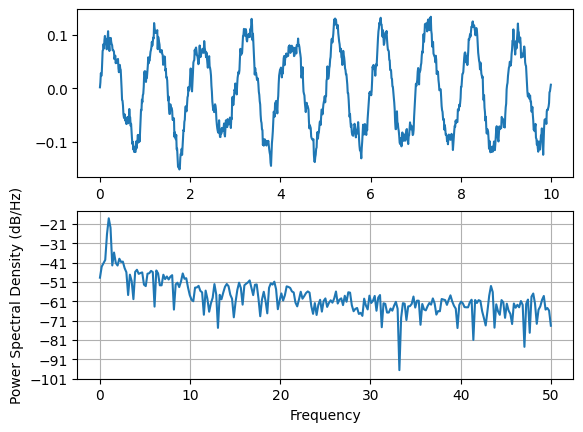

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# set random state for reproducibility
np.random.seed(19695601)

diff = 0.01
ax = np.arange(0, 10, diff)
n = np.random.randn(len(ax))
by = np.exp(-ax / 0.05)

cn = np.convolve(n, by) * diff
cn = cn[:len(ax)]
s = 0.1 * np.sin(2 * np.pi * ax) + cn

plt.subplot(211)
plt.plot(ax, s)
plt.subplot(212)
plt.psd(s, 512, 1 / diff)

plt.show()


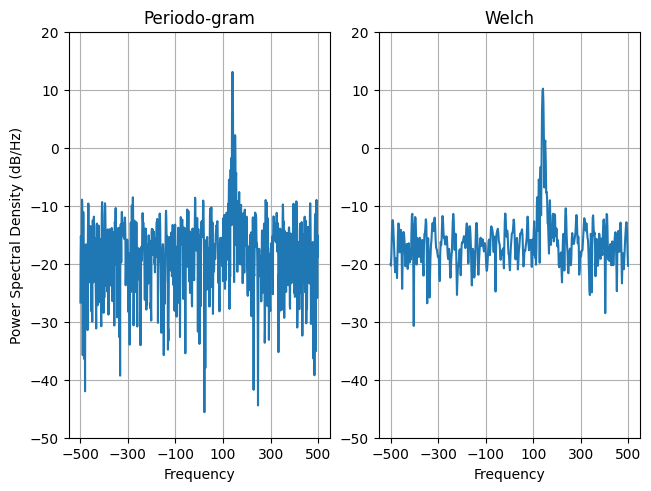

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec


# set random valueto ensure reproducibility
random_rep = np.random.RandomState(19680801) 

frame_per_second = 1000
a = np.linspace(0, 0.3, 301)
b = np.array([2, 8]).reshape(-1, 1)
c = np.array([150, 140]).reshape(-1, 1)
d = (b * np.exp(2j * np.pi * c * a)).sum(axis = 0) + 5 * random_rep.randn(*a.shape)

figure, (a0, a1) = plt.subplots(ncols = 2,
								constrained_layout = True)

e = np.arange(-50, 30, 10)
f = (e[0], e[-1])
g = np.arange(-500, 550, 200)

a0.psd(d, NFFT = 301, 
	Fs = frame_per_second,
	window = mlab.window_none, 
	pad_to = 1024,
	scale_by_freq = True)

a0.set_title('Periodo-gram')
a0.set_yticks(e)
a0.set_xticks(g)
a0.grid(True)
a0.set_ylim(f)

a1.psd(d, NFFT = 150,
	Fs = frame_per_second,
	window = mlab.window_none, 
	pad_to = 512, 
	noverlap = 75,
	scale_by_freq = True)

a1.set_title('Welch')
a1.set_xticks(g)
a1.set_yticks(e)

# overwriting the y-label added by `psd`
a1.set_ylabel('')
a1.grid(True)
a1.set_ylim(f)

plt.show()
